###TRABAJO PRÁCTICO N°1
Integrantes: \
-Enzo Ferrari \
-Abril Rodriguez \
-Micaela Pozzo

###Ejercicio 1

Exploración del Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Leer un archivo CSV
df = pd.read_csv('/content/Student_Performance.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [ ]:
# Obtener el número de filas y columnas
print("Número de filas y columnas:", df.shape)


Número de filas y columnas: (10000, 6)


In [ ]:
# Obtener información sobre las columnas
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


Podemos observar que no hay valores faltantes en el conjunto de datos.

##Descripción de las Columnas:
-Hours Studied: Columna de enteros que representa las horas estudiadas.\
-Previous Scores: Columna de enteros que representa puntajes anteriores.\
-Extracurricular Activities: Columna de tipo objeto (generalmente cadenas de texto) que representa actividades extracurriculares.\
-Sleep Hours: Columna de enteros que representa las horas de sueño.\
-Sample Question Papers Practiced: Columna de enteros que representa la cantidad de ejercicios prácticos.\
-Performance Index: Columna de números decimales (float64) que representa el índice de rendimiento.

In [ ]:
# Obtener estadísticas descriptivas de las columnas numéricas
print(df.describe())


       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

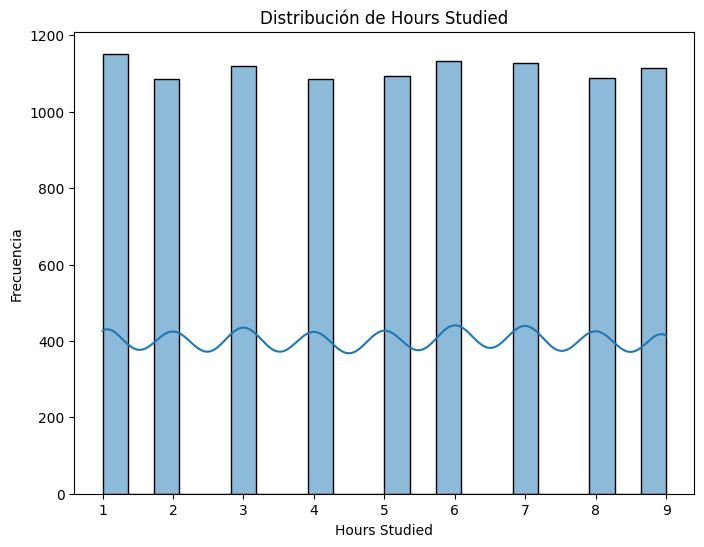

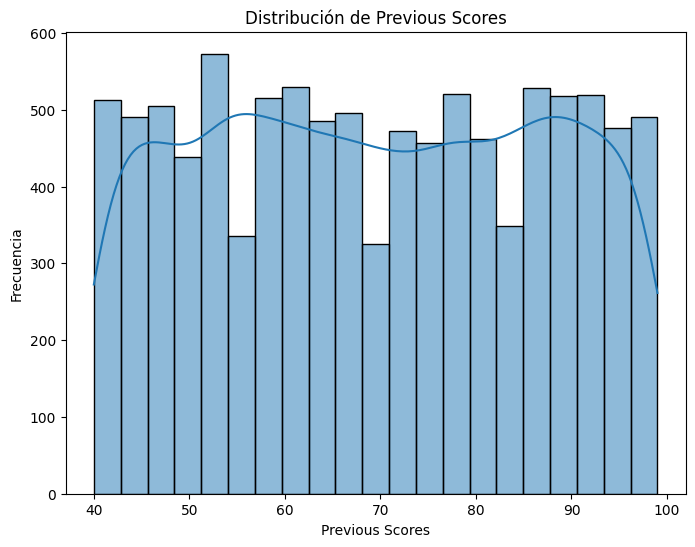

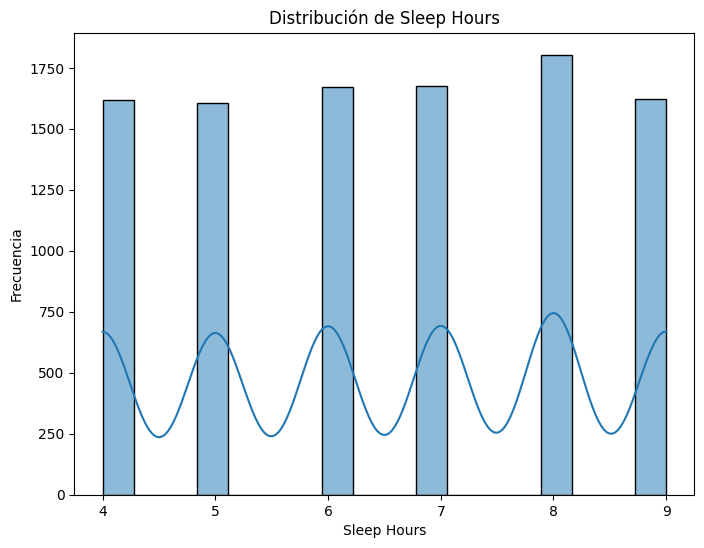

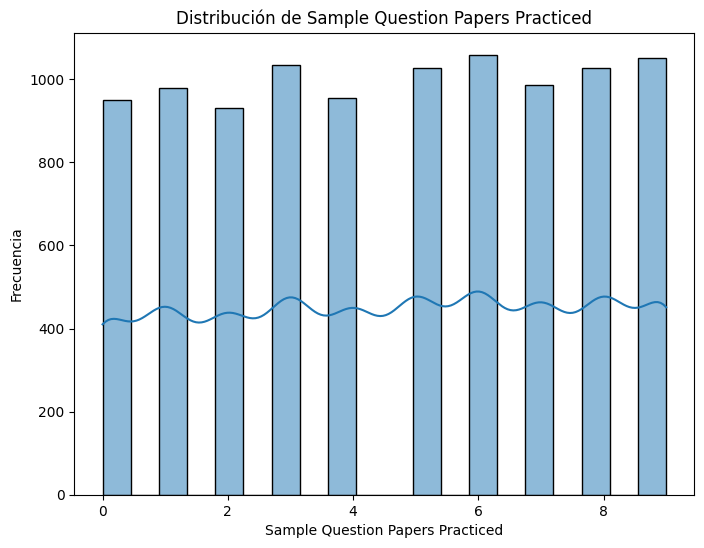

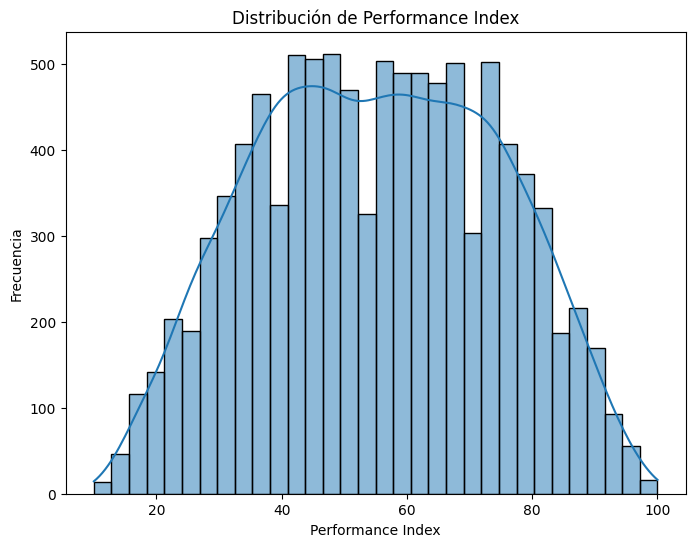

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Observar la distribución de las variables numéricas
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Analizamos la distribución de los datos en las variables y la de 'Performance index' es la que más se asemeja a una distribución normal. El resto de las variables son uniformes en el conjunto de datos, menos 'Previus Score' que es una distribución que se asemeja a una forma uniforme en su centro, con una frecuencia constante en la mayoría de los valores. Pero, se observan fluctuaciones y algunos valores atípicos que influyen en la apariencia general del histograma, dando lugar a una distribución rectangular modificada.

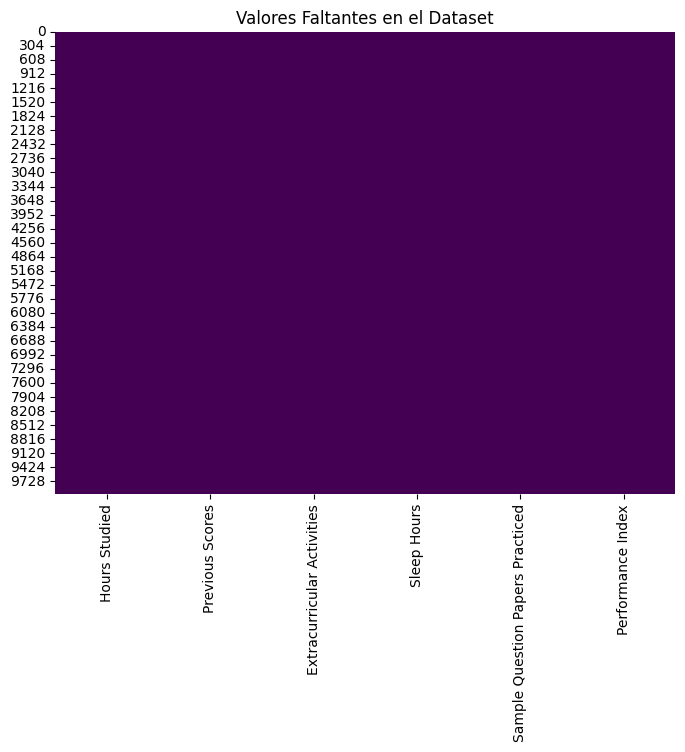

Valores faltantes por columna:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [ ]:
# Identificar valores faltantes
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Dataset')
plt.show()

# Contar valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

No hay valores faltantes en el conjunto de datos.

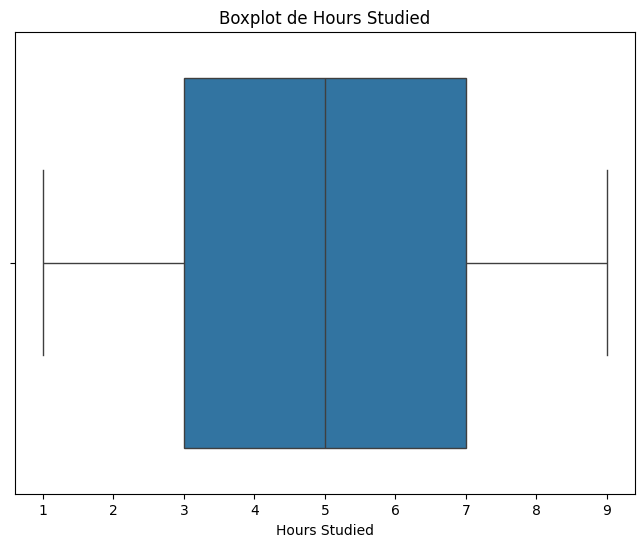

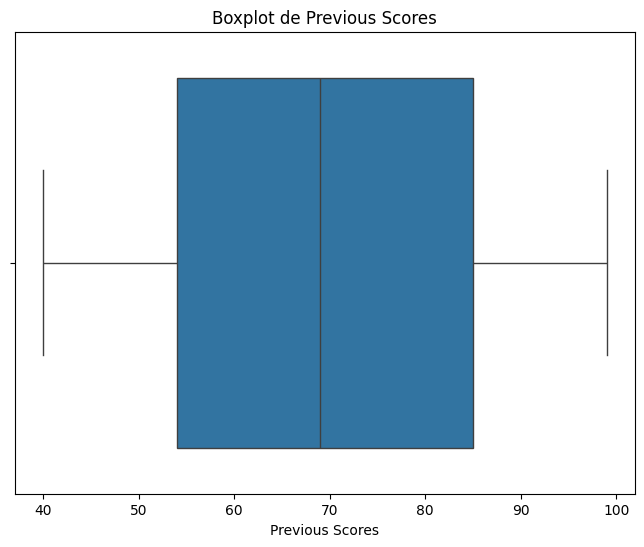

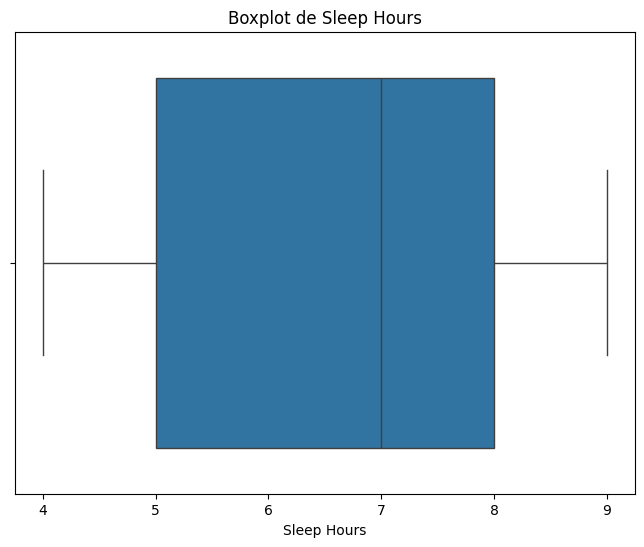

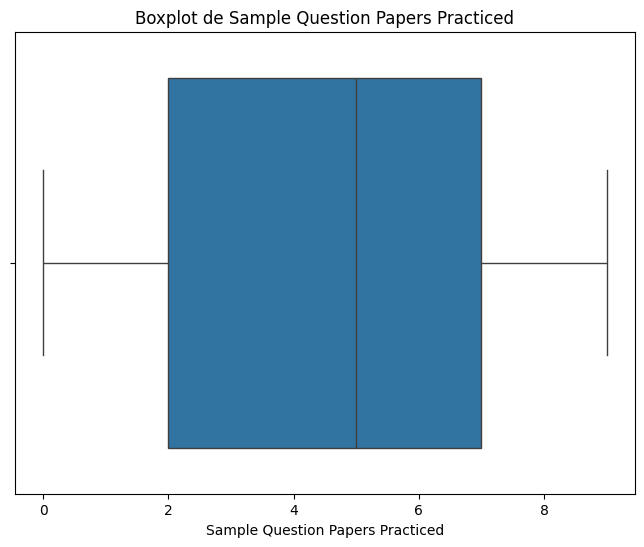

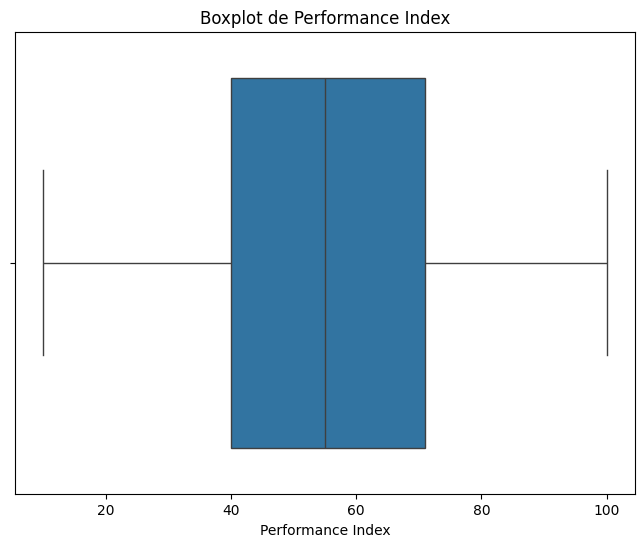

In [ ]:
# Boxplots para identificar valores atípicos
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()


En los gráficos se puede observar una distribución relativamente simétrica y concentrada de los datos, con poca variabilidad extrema o valores atípicos notables en las variables: 'Hours Studied', 'Previus Scores' y 'Performance Index' y en las variables 'Sleep Hours' y 'Sample Question Parers Practiced' se observa una distribución sesgada hacia la derecha con la presencia potencial de valores extremos en el lado derecho.  

##Manejo de Variables Numéricas (enteros y números decimales)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('/content/Student_Performance.csv')

# Seleccionar solo las columnas numéricas para escalar
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

# Crear un nuevo DataFrame con solo las columnas numéricas
df_numeric = df[numeric_columns]

# Escalar las columnas numéricas utilizando StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Reemplazar las columnas numéricas en el DataFrame original con las columnas escaladas
df[numeric_columns] = df_scaled

# Mostrar las primeras filas del DataFrame original con las columnas escaladas
print("DataFrame Original con las Columnas Numéricas Escaladas:")
print(df.head())



DataFrame Original con las Columnas Numéricas Escaladas:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                        Yes     1.456205   
1      -0.383481         0.723913                         No    -1.492294   
2       1.161410        -1.063626                        Yes     0.276805   
3       0.002742        -1.005963                        Yes    -0.902594   
4       0.775188         0.320275                         No     0.866505   

   Sample Question Papers Practiced  Performance Index  
0                         -1.249754               91.0  
1                         -0.900982               65.0  
2                         -0.900982               45.0  
3                         -0.900982               36.0  
4                          0.145333               66.0  


##Manejo de Variables Categóricas (texto/objetos)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Seleccionar columnas  categóricas
categorical_columns = ['Extracurricular Activities']

# Aplicar One-Hot Encoding a las columnas categóricas
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)],
    remainder='passthrough'
)
df_encoded = pd.DataFrame(ct.fit_transform(df[categorical_columns]), columns=ct.get_feature_names_out(categorical_columns))

# Combinar las columnas numéricas escaladas y las características codificadas en un solo DataFrame
df_final = pd.concat([df, df_encoded], axis=1)

# Mostrar las primeras filas del DataFrame final
print("DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas:")
print(df_final.head())

DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                        Yes     1.456205   
1      -0.383481         0.723913                         No    -1.492294   
2       1.161410        -1.063626                        Yes     0.276805   
3       0.002742        -1.005963                        Yes    -0.902594   
4       0.775188         0.320275                         No     0.866505   

   Sample Question Papers Practiced  Performance Index  \
0                         -1.249754               91.0   
1                         -0.900982               65.0   
2                         -0.900982               45.0   
3                         -0.900982               36.0   
4                          0.145333               66.0   

   one_hot_encoder__Extracurricular Activities_No  \
0                                             0.0   
1     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Imprimir las primeras filas del DataFrame final
print("DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas:")
print(df_final.head())

# Verificar estadísticas de las columnas numéricas en df_final
print("\nEstadísticas de las Columnas Numéricas en df_final:")
print(df_final[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].describe())

# Verificar las columnas categóricas codificadas en df_final
print("\nColumnas Categóricas Codificadas en df_final:")
print(df_final.filter(regex='^Extracurricular'))

# Verificar las dimensiones del DataFrame final
print("\nDimensiones del DataFrame Final (filas, columnas):")
print(df_final.shape)


DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                        Yes     1.456205   
1      -0.383481         0.723913                         No    -1.492294   
2       1.161410        -1.063626                        Yes     0.276805   
3       0.002742        -1.005963                        Yes    -0.902594   
4       0.775188         0.320275                         No     0.866505   

   Sample Question Papers Practiced  Performance Index  \
0                         -1.249754               91.0   
1                         -0.900982               65.0   
2                         -0.900982               45.0   
3                         -0.900982               36.0   
4                          0.145333               66.0   

   one_hot_encoder__Extracurricular Activities_No  \
0                                             0.0   
1     

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Hours Studied                                    10000 non-null  float64
 1   Previous Scores                                  10000 non-null  float64
 2   Extracurricular Activities                       10000 non-null  object 
 3   Sleep Hours                                      10000 non-null  float64
 4   Sample Question Papers Practiced                 10000 non-null  float64
 5   Performance Index                                10000 non-null  float64
 6   one_hot_encoder__Extracurricular Activities_No   10000 non-null  float64
 7   one_hot_encoder__Extracurricular Activities_Yes  10000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


In [ ]:
# Eliminar la columna original categórica del DataFrame final
df_final.drop('Extracurricular Activities', axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame final actualizado
print("DataFrame Final sin la Columna Categórica Original:")
print(df_final.head())


DataFrame Final sin la Columna Categórica Original:
   Hours Studied  Previous Scores  Sleep Hours  \
0       0.775188         1.704176     1.456205   
1      -0.383481         0.723913    -1.492294   
2       1.161410        -1.063626     0.276805   
3       0.002742        -1.005963    -0.902594   
4       0.775188         0.320275     0.866505   

   Sample Question Papers Practiced  Performance Index  \
0                         -1.249754               91.0   
1                         -0.900982               65.0   
2                         -0.900982               45.0   
3                         -0.900982               36.0   
4                          0.145333               66.0   

   one_hot_encoder__Extracurricular Activities_No  \
0                                             0.0   
1                                             1.0   
2                                             0.0   
3                                             0.0   
4                                

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Hours Studied                                    10000 non-null  float64
 1   Previous Scores                                  10000 non-null  float64
 2   Sleep Hours                                      10000 non-null  float64
 3   Sample Question Papers Practiced                 10000 non-null  float64
 4   Performance Index                                10000 non-null  float64
 5   one_hot_encoder__Extracurricular Activities_No   10000 non-null  float64
 6   one_hot_encoder__Extracurricular Activities_Yes  10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB


 Análisis exploratorio de datos en el DataFrame 'df_final' para comprender mejor la distribución de las variables después de aplicar las transformaciones.

In [ ]:
# Resumen estadístico de las variables numéricas
print("Resumen estadístico de las variables numéricas:")
print(df_final.describe())

# Resumen de las variables categóricas codificadas
print("\nResumen de las variables categóricas codificadas:")
print(df_final.filter(regex='^Extracurricular').sum())


Resumen estadístico de las variables numéricas:
       Hours Studied  Previous Scores   Sleep Hours  \
count   1.000000e+04     1.000000e+04  1.000000e+04   
mean    1.048051e-16    -1.296740e-16  1.648459e-16   
std     1.000050e+00     1.000050e+00  1.000050e+00   
min    -1.542149e+00    -1.697914e+00 -1.492294e+00   
25%    -7.697033e-01    -8.906381e-01 -9.025945e-01   
50%     2.742182e-03    -2.570019e-02  2.768051e-01   
75%     7.751877e-01     8.969003e-01  8.665048e-01   
max     1.547633e+00     1.704176e+00  1.456205e+00   

       Sample Question Papers Practiced  Performance Index  \
count                      1.000000e+04       10000.000000   
mean                      -1.293188e-16          55.224800   
std                        1.000050e+00          19.212558   
min                       -1.598526e+00          10.000000   
25%                       -9.009822e-01          40.000000   
50%                        1.453332e-01          55.000000   
75%                   

Nombres de las columnas en df_final:
Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'one_hot_encoder__Extracurricular Activities_No',
       'one_hot_encoder__Extracurricular Activities_Yes'],
      dtype='object')


<ipython-input-15-09ff24ac852d>:14: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=df_final[numeric_columns], palette=palette)


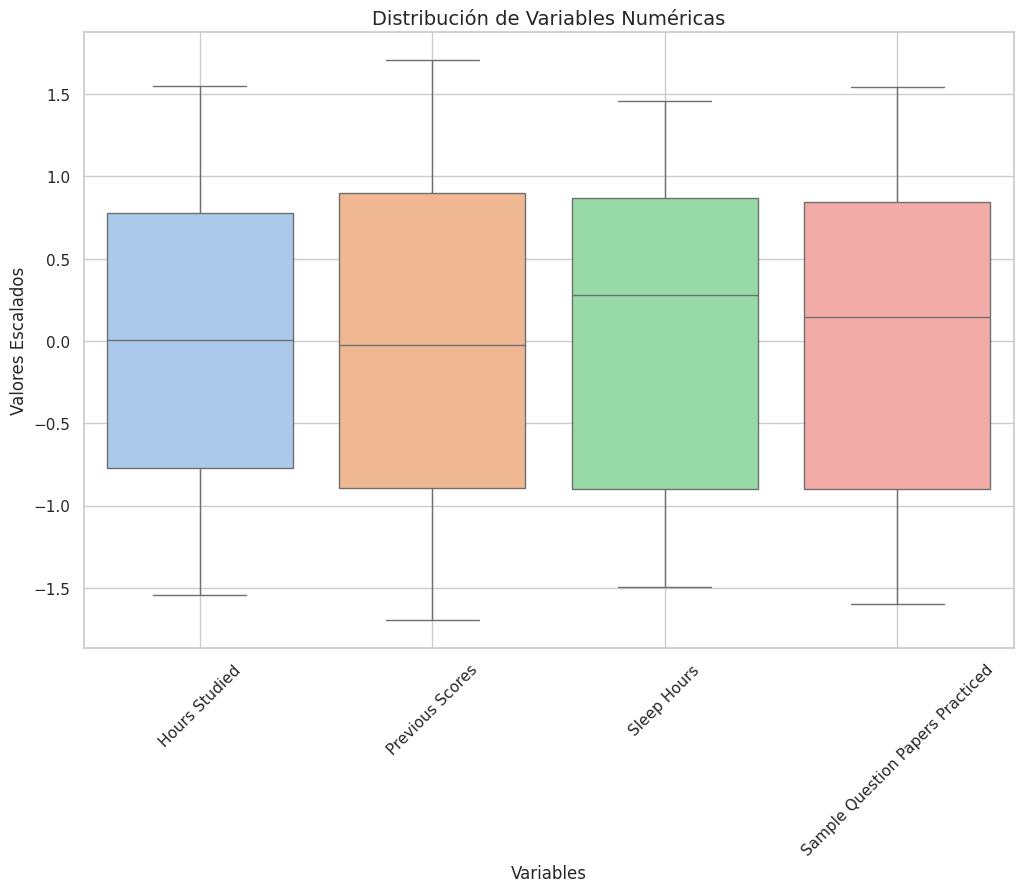

<ipython-input-15-09ff24ac852d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_final.filter(regex='^one_hot_encoder__Extracurricular Activities').columns,
<ipython-input-15-09ff24ac852d>:24: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(x=df_final.filter(regex='^one_hot_encoder__Extracurricular Activities').columns,


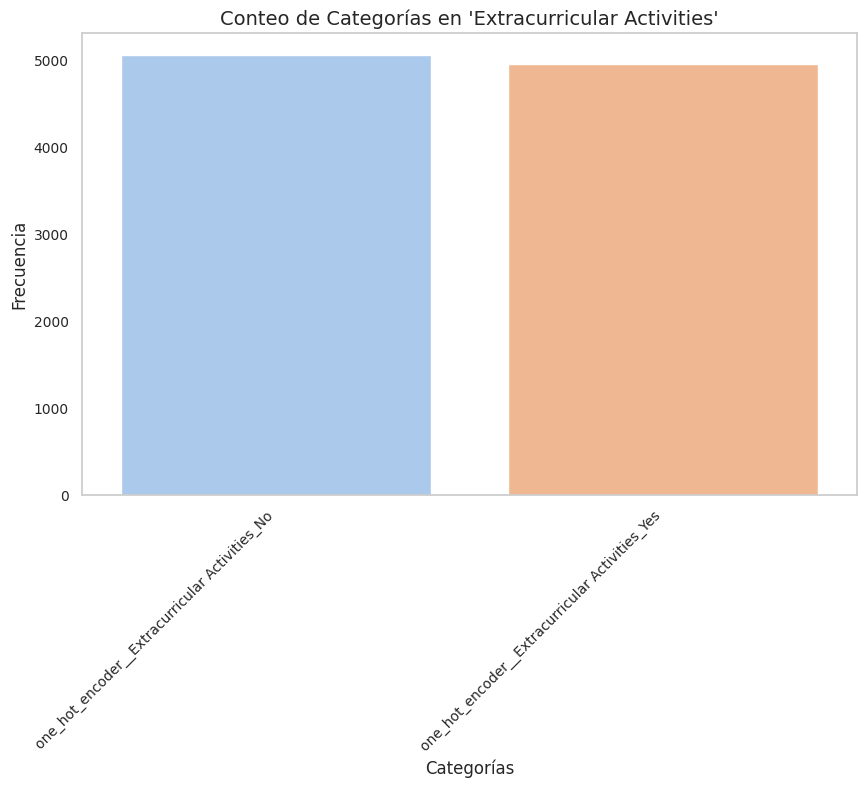

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo y la paleta de colores
sns.set(style="whitegrid")  # Establecer un fondo blanco con cuadrícula
palette = sns.color_palette("pastel")  # Utilizar una paleta de colores pasteles

# Verificar los nombres de las columnas en df_final
print("Nombres de las columnas en df_final:")
print(df_final.columns)

# Visualizar distribución de las variables numéricas (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_final[numeric_columns], palette=palette)
plt.title("Distribución de Variables Numéricas", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Valores Escalados", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  # Agregar cuadrícula
plt.show()

# Visualizar conteo de las variables categóricas codificadas (Gráfico de barras)
plt.figure(figsize=(10, 6))
sns.barplot(x=df_final.filter(regex='^one_hot_encoder__Extracurricular Activities').columns,
            y=df_final.filter(regex='^one_hot_encoder__Extracurricular Activities').sum(),
            palette=palette)
plt.title("Conteo de Categorías en 'Extracurricular Activities'", fontsize=14)
plt.xlabel("Categorías", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')  # Agregar cuadrícula en el eje y
plt.show()


Podemos observar las variables finales después de las transformaciones.

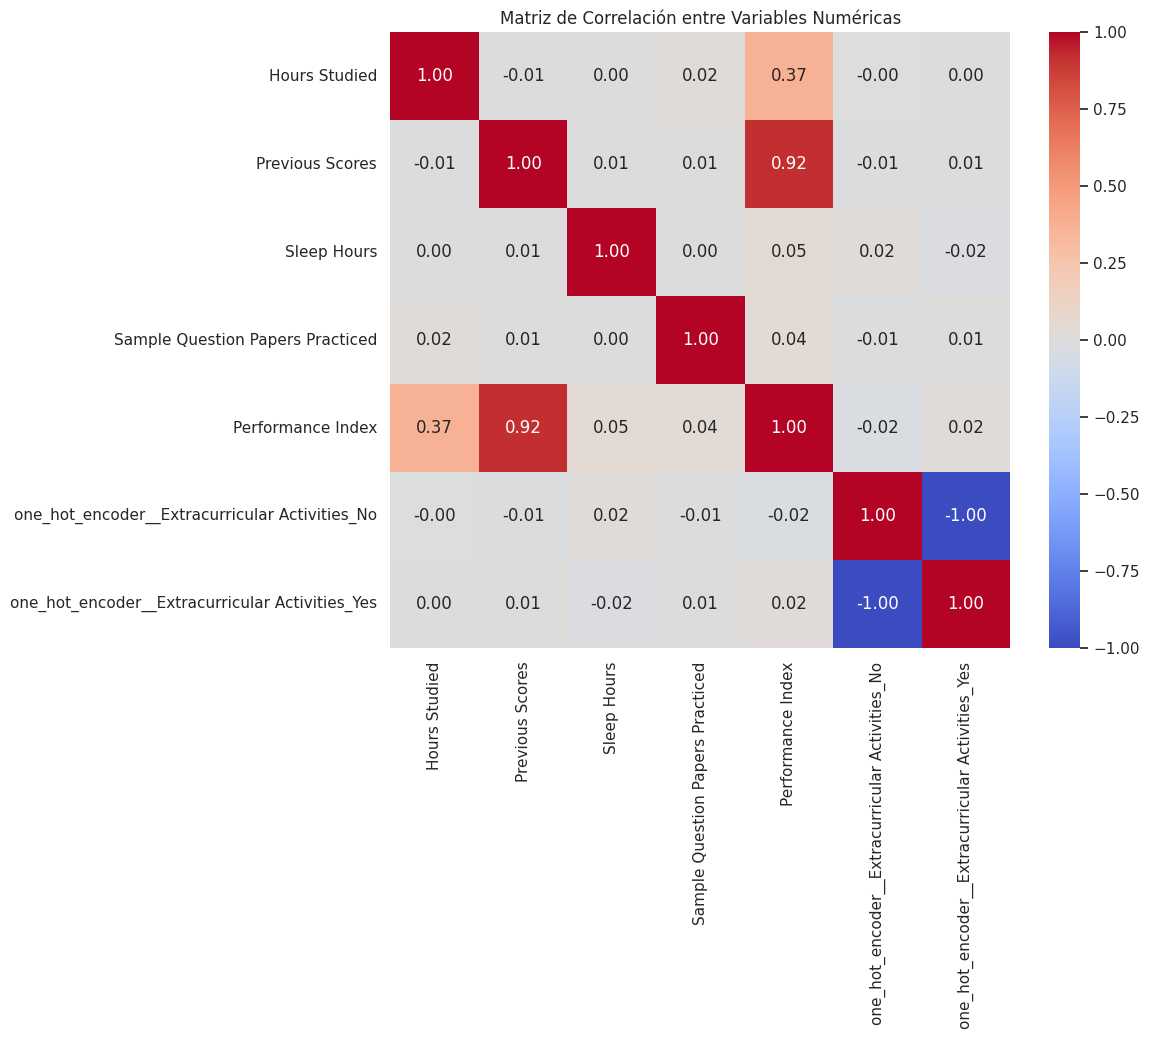

In [ ]:
# Matriz de correlación
correlation_matrix = df_final.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


En la matriz de correlación entre las variables podemos observar que hay fuerte relación entre las variables 'Previous Scores' y 'Performance index'. Entre 'Performance index' y 'Hours Studied' hay una relación positiva de moderada magnitud, no tan fuerte como las otras dos variables.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Guardamos el dataframe final

In [ ]:
# Guardar el DataFrame final en un archivo CSV
df_final.to_csv('dataset_final.csv', index=False)


Carga y división de los datos

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df_final.drop('Performance Index', axis=1)
y = df_final['Performance Index']


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Definición del modelo

In [ ]:
# Inicializar el modelo secuencial
from keras import regularizers

# Inicializar el modelo secuencial con regularización L2
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


Entrenamos el modelo

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 5s 10ms/step - loss: 1923.9703 - val_loss: 33.2455
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 21.6097 - val_loss: 18.2213
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 16.0987 - val_loss: 13.5943
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 11.9577 - val_loss: 10.0951
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 9.0881 - val_loss: 7.7911
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 7.2430 - val_loss: 6.4061
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 6.1847 - val_loss: 5.6377
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: 5.6046 - val_loss: 5.2749
Epoch 9/50
200/200 [==============================] - 1s 4ms/step - loss: 5.2728 - val_loss: 5.1761
Epoch 10/50
200/200 [==============================] - 1s 4ms/step - loss: 5.0136 - val_l

Evaluación del modelo

In [ ]:
# Evaluar el modelo con el conjunto de prueba
mse = model.evaluate(X_test, y_test)
print(f'MSE (Mean Squared Error): {mse}')

# Predicciones
y_pred = model.predict(X_test)


63/63 [==============================] - 0s 3ms/step - loss: 4.4135
MSE (Mean Squared Error): 4.41352653503418
63/63 [==============================] - 0s 2ms/step


El  MSE obtenido fue  de 4.3982 indica que el modelo tiene un error medio cuadrático relativamente bajo en el conjunto de prueba, lo que sugiere que las predicciones del modelo son bastante cercanas a las etiquetas verdaderas en promedio.

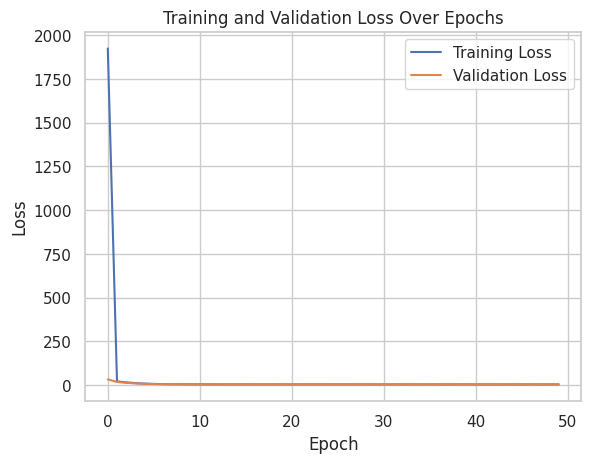

In [ ]:
# Plot de la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


 Podemos observar la evolución de la pérdida durante el entrenamiento del modelo, la comparación entre las predicciones y los valores verdaderos. \
 La curva de pérdida de entrenamiento que disminuye indica que el modelo está aprendiendo de los datos de entrenamiento. Idealmente, esperamos que esta pérdida disminuya a medida que el modelo se ajusta mejor a los datos de entrenamiento.\
 Un gráfico con una curva de pérdida de entrenamiento descendente y una curva de pérdida de validación horizontal significa que el modelo está aprendiendo de los datos de entrenamiento.

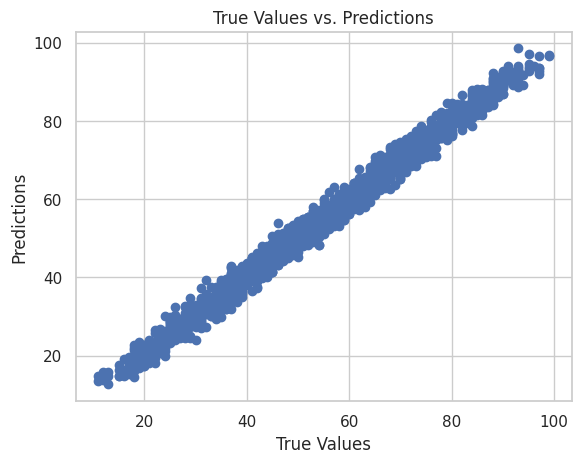

Coeficiente de Determinación (R²): 0.9884101823543175


In [ ]:
# Comparar predicciones vs. etiquetas verdaderas
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Calcular el coeficiente de determinación (R²)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R²): {r2}')

El cálculo del coeficiente de determinación (R²) como medida de rendimiento del modelo. \
Obtuvimos un coeficiente de determinación (R²) de 0.98 es un buen resultado que indica que el modelo de regresión está capturando de manera efectiva la estructura subyacente en los datos y es capaz de hacer predicciones altamente precisas sobre la variable de interés.

###Conclusiones e Interpretación:
El modelo ha demostrado un rendimiento sólido con un MSE de 4.41 y un R² de 0.98\
La alta correlación (R²) sugiere que el modelo explica casi el 99% de la variabilidad en la variable objetivo.\
Las visualizaciones proporcionadas ayudan a visualizar la calidad de las predicciones y el proceso de aprendizaje del modelo.
Estos resultados indican un modelo altamente predictivo y bien ajustado a los datos utilizados en la evaluación.